<a href="https://colab.research.google.com/github/danielaterra/shape-features/blob/main/MV_shapeFeatures_versao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conecta gdrive #

In [1]:
#from google.colab import drive
#drive.mount("/content/drive/")

In [25]:
import sys
import os

In [26]:
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),'utils'))
sys.path.append(os.getcwd())

#R libs

In [4]:
'''# activate R magic
%load_ext rpy2.ipython'''

'# activate R magic\n%load_ext rpy2.ipython'

In [5]:
'''%%R
reload_ext rpy2.ipython
config IPCompleter.greedy= True
config InlineBackend.figure_format = 'retina
'''

"%%R\nreload_ext rpy2.ipython\nconfig IPCompleter.greedy= True\nconfig InlineBackend.figure_format = 'retina\n"

In [6]:
# Install if it's your first time to run
'''%%R
install.packages("ggplot2")
install.packages("ggthemes")
install.packages("GGally")
install.packages("Hotelling")
install.packages("reshape2")
install.packages("readr")
install.packages("tidyverse")
install.packages("dplyr")'''

'%%R\ninstall.packages("ggplot2")\ninstall.packages("ggthemes")\ninstall.packages("GGally")\ninstall.packages("Hotelling")\ninstall.packages("reshape2")\ninstall.packages("readr")\ninstall.packages("tidyverse")\ninstall.packages("dplyr")'

In [7]:
'''
%%R
#library(radiant)
library(ggplot2)
library(ggthemes)
library(GGally)
library(Hotelling)
library(reshape2)
library(readr)
'''

'\n%%R\n#library(radiant)\nlibrary(ggplot2)\nlibrary(ggthemes)\nlibrary(GGally)\nlibrary(Hotelling)\nlibrary(reshape2)\nlibrary(readr)\n'

In [8]:
'''!pip install ggplot
!pip install plotnine
'''

'!pip install ggplot\n!pip install plotnine\n'

In [27]:
import numpy as np
import pandas as pd
from math import sqrt
import os
import sys
import seaborn
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage import morphology, measure
from skimage.draw import polygon, polygon_perimeter
from random import randint
from random import sample
import csv
#import rpy2
import matplotlib
SMALL_SIZE = 8
matplotlib.rc('font', size=SMALL_SIZE-1)
matplotlib.rc('axes', titlesize=SMALL_SIZE)
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, norm
from plotnine import ggplot, aes, facet_grid, labs, geom_col, theme, theme_tufte
#from ggplot import *
import utils.functions


# Multivariate Analysis#

## Lê csv estatisticas ##

In [28]:
## Recupera arquivo
normalized_fts =pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'files', 'normalized_features.csv'))

In [30]:
normalized_fts.shape


(3233, 143)

In [31]:
vars_N = ['Use_curv'+str(i)+'N' for i in np.arange(1,9)]
vars_C = ['Use_curv'+str(i)+'C' for i in np.arange(1,9)]
vars_NC = vars_N + vars_C
print(vars_NC, end='')

['Use_curv1N', 'Use_curv2N', 'Use_curv3N', 'Use_curv4N', 'Use_curv5N', 'Use_curv6N', 'Use_curv7N', 'Use_curv8N', 'Use_curv1C', 'Use_curv2C', 'Use_curv3C', 'Use_curv4C', 'Use_curv5C', 'Use_curv6C', 'Use_curv7C', 'Use_curv8C']

## **Correlação entre atributos do Núcleo das células**##

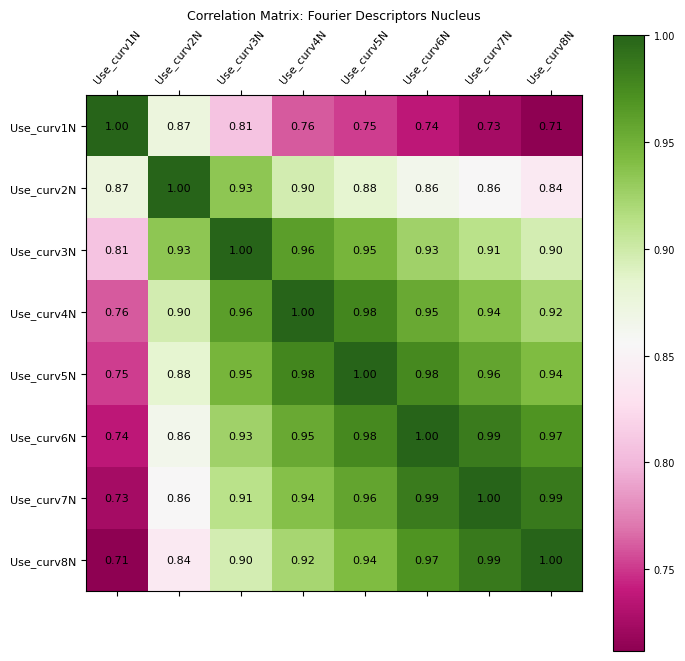

In [32]:
# Select variables to analize
nucleus_fts = normalized_fts[vars_N]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
fi = ax.matshow(nucleus_fts.corr(), cmap= 'PiYG')
ax.matshow(nucleus_fts.corr(), cmap='PiYG')

for (i, j), z in np.ndenumerate(nucleus_fts.corr()):
    ax.text(j, i, '{:0.2f}'.format(z), fontsize=8, ha='center', va='center')

plt.xticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8, rotation=50)
plt.yticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8)

cb = fig.colorbar(fi)
cb.ax.tick_params(labelsize=7)
plt.title('Correlation Matrix: Fourier Descriptors Nucleus', fontsize=9);
#filename = 'CorrNucleus.pdf'

#fig.savefig(fname="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis/"+filename)


As shown in the above matrix there are few correlations (<> 90%) among Nucleus area_by_curvature/area

In [38]:
vars_N = ['Use_curv1N', 'Use_curv2N']
print (vars_N, end='')

['Use_curv1N', 'Use_curv2N']

### Nucleus FD's distribution analysis ###
Which characteristics do not differ (i.e., have similar distribution) between classes with different degrees of lesions (low and high degree)?

### Python ###

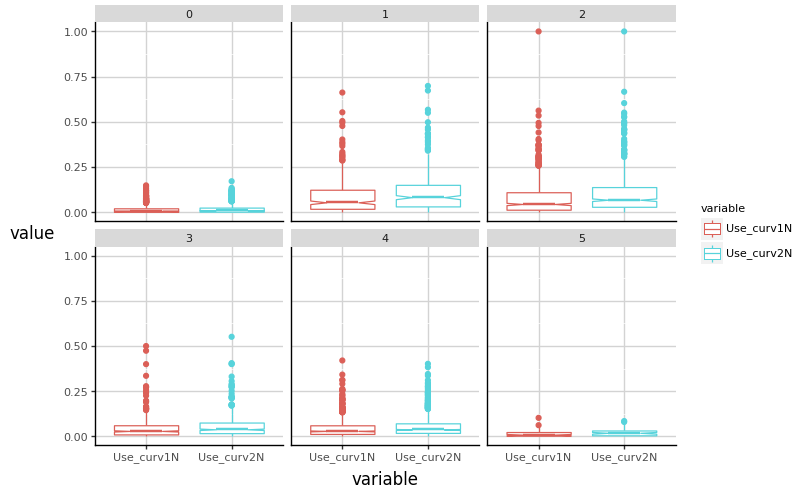

In [39]:
from plotnine import *
from plotnine.data import *
nucleus_fts_1_melt = pd.melt(normalized_fts[['bethesda']+vars_N], id_vars='bethesda')
'''p = ggplot(nucleus_fts_1_melt, aes(x='bethesda', y='value', col='bethesda')) \
    + geom_boxplot(notch = True) \
    +   facet_wrap('~variable')
'''

p = ggplot(nucleus_fts_1_melt, aes(x= 'variable', y= 'value', col=nucleus_fts_1_melt.variable, \
                         color= nucleus_fts_1_melt.variable)) + \
 geom_boxplot(aes(x='variable'), notch=True)  \
 + theme(figure_size=(8,5), \
       axis_line=element_line(size=1, colour="black"), \
         panel_grid_major=element_line(colour="#d3d3d3"), \
       text=element_text(size=8, angle=0), \
            panel_border=element_blank(), \
        panel_background=element_blank(), \
      axis_title_x = element_text(size=12, angle = 0), \
      axis_title_y = element_text(size=12, angle=0)) \
      + facet_wrap('~ bethesda')
      
#filename = 'NucleoBoxplot.pdf'
#ggsave(p,filename =filename, path ="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis", width=15, height=10)
p.draw()

In [35]:
len(vars_N)

2

### R ###

### **T-Test - teste das médias para valores de atributos entre classes** ###

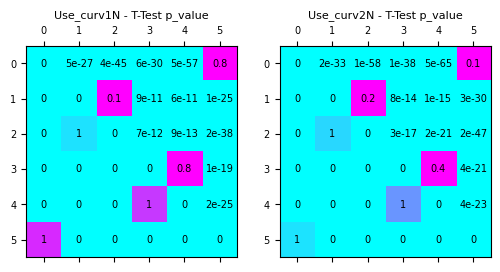

In [40]:
utils.functions.plot_pvalues_variables_less_vars(normalized_fts[['bethesda']+vars_N], vars_N, c=2)

### Nucleus selected ###

In [41]:
cols_nucleo = ['Use_curv2N']
 
print(cols_nucleo) 

['Use_curv2N']


## **Correlação entre atributos do Citoplasma das células** ##

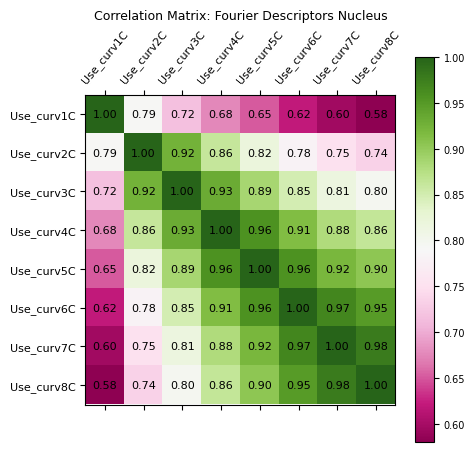

In [43]:
# Select variables to analize
nucleus_fts = normalized_fts[vars_C]
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
fi = ax.matshow(nucleus_fts.corr(), cmap= 'PiYG')
ax.matshow(nucleus_fts.corr(), cmap='PiYG')

for (i, j), z in np.ndenumerate(nucleus_fts.corr()):
    ax.text(j, i, '{:0.2f}'.format(z), fontsize=8, ha='center', va='center')

plt.xticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8, rotation=50)
plt.yticks(range(nucleus_fts.select_dtypes(['number']).shape[1]), nucleus_fts.select_dtypes(['number']).columns, fontsize=8)

cb = fig.colorbar(fi)
cb.ax.tick_params(labelsize=7)
plt.title('Correlation Matrix: Fourier Descriptors Nucleus', fontsize=9);
#filename = 'CorrNucleus.pdf'

#fig.savefig(fname="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis/"+filename)


As shown in the above matrix we can select the following features with less than 90% correlations with each other:
- **Use_curv1C, Use_curv2C, Use_curv4C, Use_curv7C**

In [45]:
vars_C = ['Use_curv1C', 'Use_curv2C', 'Use_curv4C', 'Use_curv7C']

#### Python

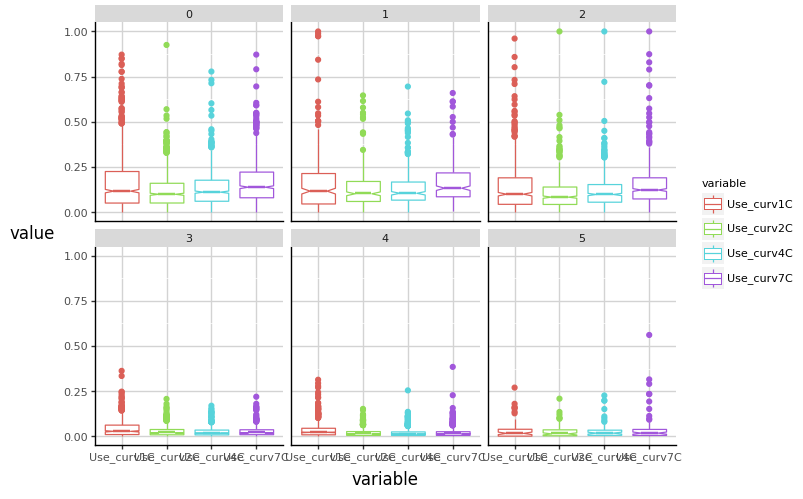

In [51]:
cyto_fts_1_melt = pd.melt(normalized_fts[['bethesda']+vars_C], id_vars='bethesda')
'''p = ggplot(cyto_fts_1_melt, aes(x='bethesda', y='value', col='bethesda')) \
    + geom_boxplot(notch = True) \
    +   facet_wrap('~variable')
'''

p = ggplot(cyto_fts_1_melt, aes(x= 'variable', y= 'value', col=cyto_fts_1_melt.variable, \
                         color= cyto_fts_1_melt.variable)) + \
 geom_boxplot(aes(x='variable'), notch=True)  \
 + theme(figure_size=(8,5), \
       axis_line=element_line(size=1, colour="black"), \
         panel_grid_major=element_line(colour="#d3d3d3"), \
       text=element_text(size=8, angle=0), \
            panel_border=element_blank(), \
        panel_background=element_blank(), \
      axis_title_x = element_text(size=12, angle = 0), \
      axis_title_y = element_text(size=12, angle=0)) \
      + facet_wrap('~ bethesda')
      
#filename = 'NucleoBoxplot.pdf'
#ggsave(p,filename =filename, path ="/content/drive/MyDrive/PDSE/ShapeBased_multivar_analysis", width=15, height=10)
p.draw()


#### R  

#### **T-Test - teste das médias para valores de atributos entre classes**

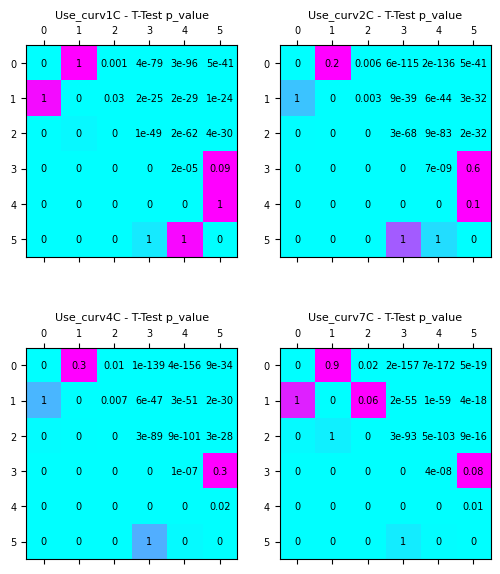

In [50]:
utils.functions.plot_pvalues_variables(normalized_fts[['bethesda']+vars_C], vars_C, c=2, l=2)

### Cytoplasm selected ###
- No Use_curv selected for cytoplasm 
- All Use_curv selected are similar in normal and in lesions (ASCUS) cases

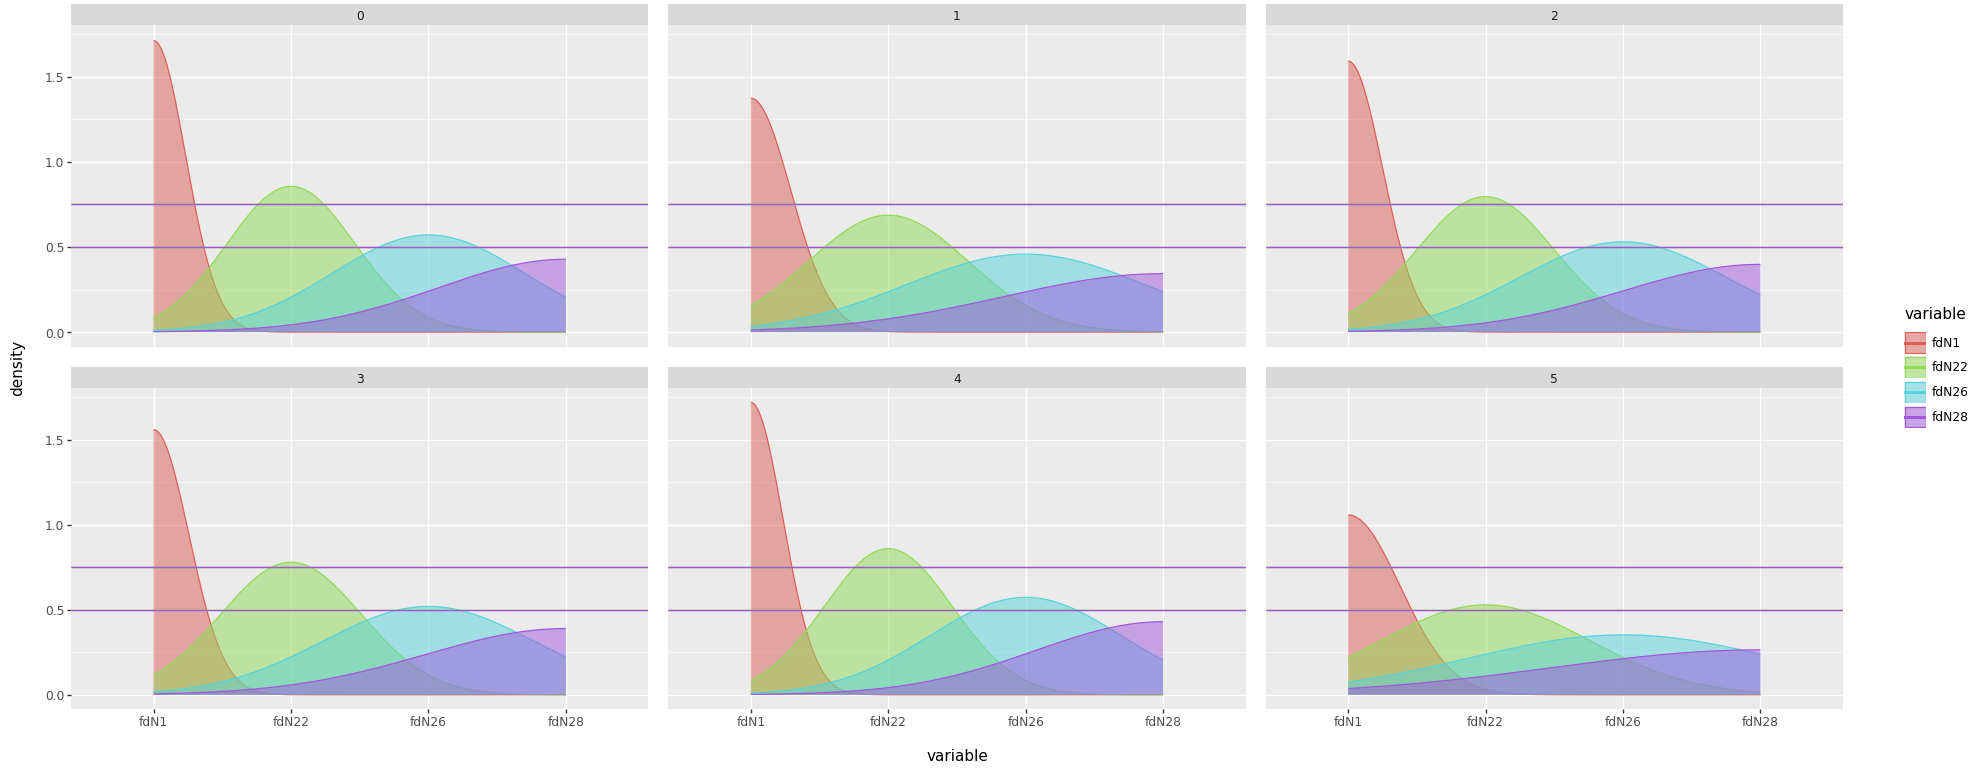

In [ ]:
p = ggplot(normalized_fts_2_melt, aes(x= normalized_fts_2_melt.variable, fill = normalized_fts_2_melt.variable, color= normalized_fts_2_melt.variable))  \
+ geom_density(alpha=0.5, position="identity") + facet_wrap("~bethesda") + theme(figure_size=(20, 8)) \
+ geom_hline(normalized_fts_2_melt, aes(yintercept= 0.75, colour= normalized_fts_2_melt.variable)) +  geom_hline(normalized_fts_2_melt, aes(yintercept= 0.5, color= normalized_fts_2_melt.variable))
p.draw()